In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

plt.style.use('bmh')

In [2]:
sf_pop = {'2019': 881549, '2018': 883305, '2017': 884363, '2016': 883305, '2015': 864816, 
          '2014': 852469,'2013': 837442, '2012': 825865, '2011': 812826, '2010': 805463, 
          '2009': 774347,'2008': 767067, '2007': 758348, '2006': 751431, '2005': 748846, 
          '2004': 750133,'2003': 757638, '2002': 755862, '2001': 777613, '2000': 777340}
year=[]
pop=[]
for key, val in sf_pop.items():
    year.append(int(key))
    pop.append(int(val))
d={'year': year, 'pop': pop}
sf_pop_df = pd.DataFrame(d).sort_values('year')
sf_pop_df

,year,pop
19,2000,777340
18,2001,777613
17,2002,755862
16,2003,757638
15,2004,750133
14,2005,748846
13,2006,751431
12,2007,758348
11,2008,767067
10,2009,774347


# Police Incident Reports
**Two reports: from 2003 - 2018 & 2018 - Present**

Step 1: Find relevant information & combine

In [3]:
police_incidents = pd.read_csv('DataSets/Stadium Impact/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')


In [4]:
police_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 33 columns):
IncidntNum                                              int64
Category                                                object
Descript                                                object
DayOfWeek                                               object
Date                                                    object
Time                                                    object
PdDistrict                                              object
Resolution                                              object
Address                                                 object
X                                                       float64
Y                                                       float64
Location                                                object
PdId                                                    int64
SF Find Neighborhoods                                   float64
Curr

In [73]:
police_incidents['Date'].min(),police_incidents['Date'].max()

(Timestamp('2003-01-01 00:00:00'), Timestamp('2018-05-15 00:00:00'))

In [5]:
police_incidents.fillna(0)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,42.0,10.0,8.0,16.0,1.0,8.0,4.0,64.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,32.0,5.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,0.0,1.0,0.0,1.0,0.0,7.0,2.0,1.0,1.0,1.0,35.0
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,38.0,3.0,5.0,5.0,15.0,4.0,5.0,28862.0,3.0,1.0,0.0,1.0,5.0,1.0,9.0,1.0,0.0,0.0,5.0,0.0
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,53.0,3.0,5.0,20.0,8.0,4.0,5.0,28859.0,19.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200,53.0,3.0,2.0,20.0,2.0,4.0,7.0,28859.0,19.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215019,61082136,MISSING PERSON,FOUND PERSON,Monday,10/09/2006,19:30,SOUTHERN,LOCATED,0 Block of COLUMBIASQUARE ST,-122.405602,37.777265,POINT (-122.405602257452 37.7772651164878),6108213675000,32.0,1.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,24.0,0.0,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0
2215020,130355795,VEHICLE THEFT,STOLEN TRUCK,Tuesday,04/30/2013,23:30,MISSION,NONE,200 Block of BARTLETT ST,-122.419699,37.752951,POINT (-122.419698979616 37.752951196703),13035579507025,53.0,3.0,2.0,20.0,2.0,4.0,7.0,28859.0,19.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
2215021,30118617,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,01/29/2003,13:20,BAYVIEW,"ARREST, CITED",BAY SHORE BL / BACON ST,-122.402210,37.728104,POINT (-122.402210107743 37.7281042223977),3011861765016,87.0,2.0,9.0,25.0,10.0,3.0,8.0,58.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2215022,40194839,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Friday,02/13/2004,16:00,CENTRAL,NONE,500 Block of WASHINGTON ST,-122.402219,37.795713,POINT (-122.402218963687 37.7957128203502),4019483906304,106.0,6.0,3.0,6.0,3.0,1.0,10.0,28860.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [6]:
police_incidents.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'DELETE - Fire Prevention Districts', 'DELETE - Police Districts',
       'DELETE - Supervisor Districts', 'DELETE - Zip Codes',
       'DELETE - Neighborhoods', 'DELETE - 2017 Fix It Zones',
       'Civic Center Harm Reduction Project Boundary',
       'Fix It Zones as of 2017-11-06 ', 'DELETE - HSOC Zones',
       'Fix It Zones as of 2018-02-07',
       'CBD, BID and GBD Boundaries as of 2017',
       'Areas of Vulnerability, 2016', 'Central Market/Tenderloin Boundary',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces'],
      dtype='object')

In [7]:
import calendar
police_incidents['Date']=pd.to_datetime(police_incidents['Date'])
police_incidents['Month'] = police_incidents['Date'].transform(lambda x: x.month)
police_incidents['Year'] = police_incidents['Date'].transform(lambda x: x.year)
police_incidents['Month-Year'] = police_incidents['Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
police_incidents = police_incidents.sort_values('Date')

In [8]:
police_incidents.groupby(['Year','Month']).count()['Category'].tail(30)

Year  Month
2015  12       11441
2016  1        12967
      2        12106
      3        12380
      4        12328
      5        12732
      6        12094
      7        12191
      8        12471
      9        12499
      10       13388
      11       12720
      12       13007
2017  1        13084
      2        12192
      3        13711
      4        12941
      5        13267
      6        12605
      7        13171
      8        12872
      9        12684
      10       13355
      11       12347
      12       12544
2018  1        12031
      2         9947
      3        10740
      4        10306
      5         3644
Name: Category, dtype: int64

In [9]:
police_incidents[['X', 'Y']]

,X,Y
1906666,-122.445087,37.773156
2019213,-122.407808,37.763099
1896054,-122.454020,37.719106
2004214,-122.437299,37.761894
1788056,-122.397817,37.784668
...,...,...
962273,-122.447761,37.769846
962308,-122.410042,37.781954
961966,-122.447761,37.769846
961723,-122.417813,37.757101


In [10]:
zipcodes = pd.read_csv('DataSets/SF_Population/ziplatlong.csv', sep=';')
zipcodes[['Latitude','Longitude']].iloc[0,0]
zipcodes.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,94175,San Francisco,CA,37.784827,-122.727802,-8,1,"37.784827,-122.727802"
1,94160,San Francisco,CA,37.784827,-122.727802,-8,1,"37.784827,-122.727802"
2,94164,San Francisco,CA,37.784827,-122.727802,-8,1,"37.784827,-122.727802"
3,94131,San Francisco,CA,37.741797,-122.437800,-8,1,"37.741797,-122.4378"
4,94114,San Francisco,CA,37.758434,-122.435120,-8,1,"37.758434,-122.43512"


In [11]:
police_incidents['Xstr']=police_incidents['X'].transform(lambda x: str(x))
police_incidents['Ystr']=police_incidents['Y'].transform(lambda x: str(x))
police_incidents['indxStr']=police_incidents['Xstr']+police_incidents['Ystr']
police_incidents.groupby(['Year','Month']).count()['Category'].tail(30)

Year  Month
2015  12       11441
2016  1        12967
      2        12106
      3        12380
      4        12328
      5        12732
      6        12094
      7        12191
      8        12471
      9        12499
      10       13388
      11       12720
      12       13007
2017  1        13084
      2        12192
      3        13711
      4        12941
      5        13267
      6        12605
      7        13171
      8        12872
      9        12684
      10       13355
      11       12347
      12       12544
2018  1        12031
      2         9947
      3        10740
      4        10306
      5         3644
Name: Category, dtype: int64

In [12]:
addresses = police_incidents.groupby(['Address','X', 'Y']).count()['Date'].reset_index()
addresses['Lat_Long'] = addresses[['Y', 'X']].values.tolist()
addresses.isna().sum()

Address     0
X           0
Y           0
Date        0
Lat_Long    0
dtype: int64

In [13]:
from geopy.distance import geodesic
test=[37.7196874952717, -122.476327815126]

def closest_pt(row):
    distances=[]
    zips=zipcodes[['Latitude','Longitude']]
    for elem in range(len(zipcodes.index)):
        dist = geodesic((row[0],row[1]), (zips.iloc[elem,0],zips.iloc[elem,1]))
        distances.append(dist)
    return zipcodes.iloc[np.argmin(distances),0]

closest_pt(test)

94132

In [14]:
addresses['Zipcode'] = addresses['Lat_Long'].apply(closest_pt)

In [15]:
addresses['indx']=addresses['X']+addresses['Y']

In [16]:
addresses['Xstr']=addresses['X'].transform(lambda x: str(x))
addresses['Ystr']=addresses['Y'].transform(lambda x: str(x))
addresses['indxStr']=addresses['Xstr']+addresses['Ystr']
add = addresses[['Zipcode','indxStr']]
# add.to_csv('2003_2018_zips')

In [17]:
pol13_18 = pd.merge(police_incidents, add, on='indxStr')
# ISSUE WITH DATA AFTER MERGING WITH ZIPCODE DATA

In [18]:
pol13_18.groupby(['Year','Month']).count()['Category'].tail(30)

Year  Month
2015  12       17238
2016  1        18510
      2        17345
      3        18027
      4        17969
      5        18682
      6        17646
      7        17700
      8        18266
      9        17886
      10       19484
      11       18375
      12       18635
2017  1        18741
      2        17413
      3        19646
      4        18805
      5        19322
      6        18490
      7        19026
      8        18753
      9        18519
      10       20037
      11       18316
      12       18473
2018  1        17868
      2        14694
      3        15601
      4        15084
      5         5313
Name: Category, dtype: int64

In [19]:
# # pol13_18.to_csv('Polic1318.csv')
# pol13_18 = pd.read_csv('Polic1318.csv')

In [20]:
zipcodes_of_interest = ['94107','94103', '94158', '94105']
cat_of_interest = ['OTHER OFFENSES', 'NON-CRIMINAL','LARCENY/THEFT','SECONDARY CODES', 'ROBBERY',
                         'SUSPICIOUS OCC','DRUG/NARCOTIC', 'VANDALISM','DISORDERLY CONDUCT', 'DRUNKENNESS', 
                         'LIQUOR LAWS','DRIVING UNDER THE INFLUENCE','LOITERING', 'TRESPASS', 'SUICIDE']

In [21]:
pol13_18.groupby(['Year','Month']).count()['Category'].tail(30)

Year  Month
2015  12       17238
2016  1        18510
      2        17345
      3        18027
      4        17969
      5        18682
      6        17646
      7        17700
      8        18266
      9        17886
      10       19484
      11       18375
      12       18635
2017  1        18741
      2        17413
      3        19646
      4        18805
      5        19322
      6        18490
      7        19026
      8        18753
      9        18519
      10       20037
      11       18316
      12       18473
2018  1        17868
      2        14694
      3        15601
      4        15084
      5         5313
Name: Category, dtype: int64

In [22]:
pol13_18[pol13_18['Zipcode'].isin(zipcodes_of_interest)]['Category'].unique()

array(['ASSAULT', 'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES',
       'MISSING PERSON', 'OTHER OFFENSES', 'NON-CRIMINAL', 'RUNAWAY',
       'VANDALISM', 'TRESPASS', 'LARCENY/THEFT', 'VEHICLE THEFT', 'FRAUD',
       'SUSPICIOUS OCC', 'DRUG/NARCOTIC', 'WARRANTS', 'RECOVERED VEHICLE',
       'ROBBERY', 'BURGLARY', 'STOLEN PROPERTY', 'DRUNKENNESS',
       'FAMILY OFFENSES', 'DRIVING UNDER THE INFLUENCE',
       'FORGERY/COUNTERFEITING', 'LIQUOR LAWS', 'WEAPON LAWS',
       'DISORDERLY CONDUCT', 'EMBEZZLEMENT', 'KIDNAPPING', 'BAD CHECKS',
       'LOITERING', 'SEX OFFENSES, NON FORCIBLE', 'EXTORTION', 'ARSON',
       'SUICIDE', 'BRIBERY', 'GAMBLING', 'PROSTITUTION',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [23]:
import calendar
pol13_18['Date'] = pd.to_datetime(pol13_18['Date'])
pol13_18['Month'] = pol13_18['Date'].transform(lambda x: x.month)
pol13_18['Month-Year'] = pol13_18['Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
pol13_18['Year'] = pol13_18['Date'].transform(lambda x: x.year)
pol13_18.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces,Month,Year,Month-Year,Xstr,Ystr,indxStr,Zipcode
0,30003096,WEAPON LAWS,DESTRUCTION OF PROPERTY WITH EXPLOSIVES,Wednesday,2003-01-01,19:04,PARK,NONE,1600 Block of FELL ST,-122.445087,37.773156,POINT (-122.445086506657 37.7731558815454),3000309612025,24.0,7.0,11.0,18.0,15.0,5.0,11.0,29492.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,2003,Jan 2003,-122.445086506657,37.7731558815454,-122.44508650665737.7731558815454,94117
1,30020818,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Saturday,2003-01-04,14:00,PARK,NONE,1600 Block of FELL ST,-122.445087,37.773156,POINT (-122.445086506657 37.7731558815454),3002081804012,24.0,7.0,11.0,18.0,15.0,5.0,11.0,29492.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,2003,Jan 2003,-122.445086506657,37.7731558815454,-122.44508650665737.7731558815454,94117
2,30191055,VEHICLE THEFT,STOLEN AUTOMOBILE,Monday,2003-02-10,12:00,PARK,NONE,1600 Block of FELL ST,-122.445087,37.773156,POINT (-122.445086506657 37.7731558815454),3019105507021,24.0,7.0,11.0,18.0,15.0,5.0,11.0,29492.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2,2003,Feb 2003,-122.445086506657,37.7731558815454,-122.44508650665737.7731558815454,94117
3,30191055,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Monday,2003-02-10,12:00,PARK,NONE,1600 Block of FELL ST,-122.445087,37.773156,POINT (-122.445086506657 37.7731558815454),3019105507041,24.0,7.0,11.0,18.0,15.0,5.0,11.0,29492.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2,2003,Feb 2003,-122.445086506657,37.7731558815454,-122.44508650665737.7731558815454,94117
4,30470542,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Saturday,2003-04-19,16:00,PARK,NONE,1600 Block of FELL ST,-122.445087,37.773156,POINT (-122.445086506657 37.7731558815454),3047054261030,24.0,7.0,11.0,18.0,15.0,5.0,11.0,29492.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,2003,Apr 2003,-122.445086506657,37.7731558815454,-122.44508650665737.7731558815454,94117


In [24]:
mbdppol = pol13_18[['Category','Descript','Date','Month','Month-Year','Year','Time','Zipcode','PdDistrict','X','Y','Analysis Neighborhoods']][(pol13_18['Zipcode'].isin(zipcodes_of_interest))&(pol13_18['Category'].isin(cat_of_interest))]
mbdppol = mbdppol.sort_values('Date')
years = mbdppol['Year'].unique()

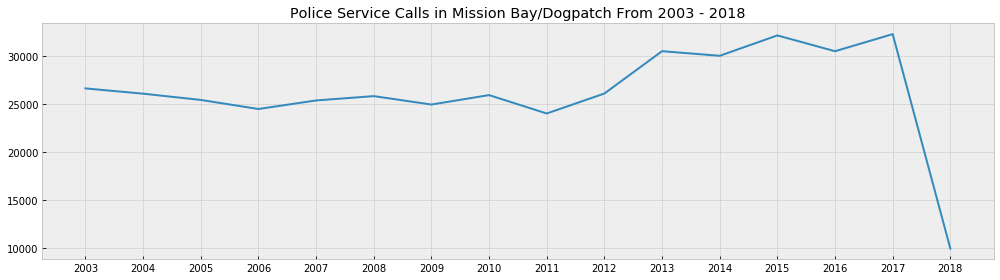

In [25]:
#Absolute Values
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(years, mbdppol.groupby('Year').count()['Date'])
ax.set_xticks(years)
ax.set_title('Police Service Calls in Mission Bay/Dogpatch From 2003 - 2018')
plt.savefig('Total_Police_Calls_2003-2018.png', dpi=300)
plt.tight_layout()
plt.show()

In [26]:
mbdp_pol_annual = mbdppol.groupby(['Year']).count()
mbdp_pol_annual = pd.merge(mbdp_pol_annual, sf_pop_df, left_on='Year', right_on='year')
mbdp_pol_annual['Normalized'] = mbdp_pol_annual['Date']/mbdp_pol_annual['pop']
mbdp_pol_annual.head(20)

,Category,Descript,Date,Month,Month-Year,Time,Zipcode,PdDistrict,X,Y,Analysis Neighborhoods,year,pop,Normalized
0,26636,26636,26636,26636,26636,26636,26636,26636,26636,26636,26630,2003,757638,0.035157
1,26085,26085,26085,26085,26085,26085,26085,26085,26085,26085,26081,2004,750133,0.034774
2,25434,25434,25434,25434,25434,25434,25434,25434,25434,25434,25433,2005,748846,0.033964
3,24487,24487,24487,24487,24487,24487,24487,24487,24487,24487,24485,2006,751431,0.032587
4,25378,25378,25378,25378,25378,25378,25378,25378,25378,25378,25378,2007,758348,0.033465
5,25831,25831,25831,25831,25831,25831,25831,25831,25831,25831,25831,2008,767067,0.033675
6,24952,24952,24952,24952,24952,24952,24952,24952,24952,24952,24952,2009,774347,0.032223
7,25937,25937,25937,25937,25937,25937,25937,25937,25937,25937,25936,2010,805463,0.032201
8,24018,24018,24018,24018,24018,24018,24018,24018,24018,24018,24018,2011,812826,0.029549
9,26102,26102,26102,26102,26102,26102,26102,26102,26102,26102,26099,2012,825865,0.031606


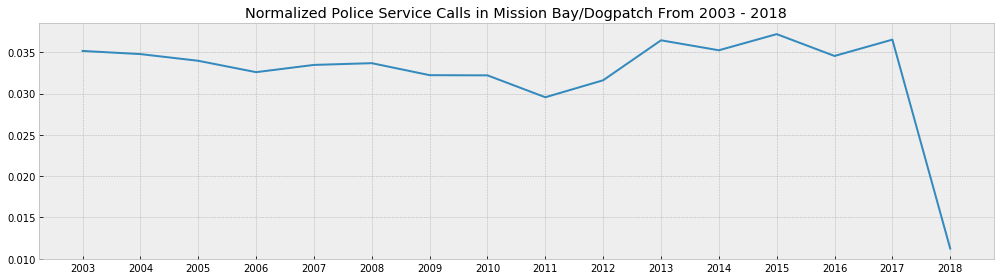

In [27]:
#Normalized Values
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(years, mbdp_pol_annual['Normalized'])
ax.set_xticks(years)
ax.set_title('Normalized Police Service Calls in Mission Bay/Dogpatch From 2003 - 2018')
plt.savefig('Normalized_Police_Calls_2003-2018.png', dpi=300)
plt.tight_layout()
plt.show()

In [28]:
pol13_18[pol13_18['Zipcode'].isin(zipcodes_of_interest)].groupby(['Zipcode','X','Y']).count().tail(20)

IncidntNum  Category  Descript  DayOfWeek  \
Zipcode X           Y                                                      
94107   -122.385038 37.754289          30        30        30         30   
        -122.385025 37.754179          40        40        40         40   
                    37.754179           4         4         4          4   
        -122.385011 37.755629          36        36        36         36   
                    37.755629          12        12        12         12   
        -122.385000 37.755520          16        16        16         16   
                    37.755520         237       237       237        237   
        -122.384413 37.753084           7         7         7          7   
        -122.384403 37.752975         105       105       105        105   
                    37.752975          16        16        16         16   
        -122.384167 37.750526           4         4         4          4   
                    37.750526         142       142       142        142   
        -122.384157 37.750416         114       114       114        114   
                    37.750416          57        57        57         57   
        -122.383583 37.754375           3         3         3          3   
                    37.754375           3         3         3          3   
        -122.383572 37.754265           6         6         6          6   
        -122.382951 37.753114           1         1         1          1   
        -122.382483 37.753196           1         1         1          1   
                    37.753196           1         1         1          1   

                               Date  Time  PdDistrict  Resolution  Address  \
Zipcode X           Y                                                        
94107   -122.385038 37.754289    30    30          30          30       30   
        -122.385025 37.754179    40    40          40          40       40   
                    37.754179     4     4           4           4        4   
        -122.385011 37.755629    36    36          36          36       36   
                    37.755629    12    12          12          12       12   
        -122.385000 37.755520    16    16          16          16       16   
                    37.755520   237   237         237         237      237   
        -122.384413 37.753084     7     7           7           7        7   
        -122.384403 37.752975   105   105         105         105      105   
                    37.752975    16    16          16          16       16   
        -122.384167 37.750526     4     4           4           4        4   
                    37.750526   142   142         142         142      142   
        -122.384157 37.750416   114   114         114         114      114   
                    37.750416    57    57          57          57       57   
        -122.383583 37.754375     3     3           3           3        3   
                    37.754375     3     3           3           3        3   
        -122.383572 37.754265     6     6           6           6        6   
        -122.382951 37.753114     1     1           1           1        1   
        -122.382483 37.753196     1     1           1           1        1   
                    37.753196     1     1           1           1        1   

                               Location  PdId  SF Find Neighborhoods  \
Zipcode X           Y                                                  
94107   -122.385038 37.754289        30    30                     30   
        -122.385025 37.754179        40    40                     40   
                    37.754179         4     4                      4   
        -122.385011 37.755629        36    36                     36   
                    37.755629        12    12                     12   
        -122.385000 37.755520        16    16                     16   
                    37.755520       237   237                    

In [29]:
police_incidents.groupby(['Year','Month']).count()['Category'].tail(20)

Year  Month
2016  10       13388
      11       12720
      12       13007
2017  1        13084
      2        12192
      3        13711
      4        12941
      5        13267
      6        12605
      7        13171
      8        12872
      9        12684
      10       13355
      11       12347
      12       12544
2018  1        12031
      2         9947
      3        10740
      4        10306
      5         3644
Name: Category, dtype: int64

In [30]:
polpresent = pd.read_csv('norm_police_present.csv')

In [32]:
polpresent = polpresent.drop(columns='Unnamed: 0')

In [33]:
polpresent.groupby(['Incident Year','Month']).count()['Incident Category'].tail(30)

Incident Year  Month
2018           1        13321
               2        11817
               3        12508
               4        12502
               5        12951
               6        12403
               7        13802
               8        13899
               9        12782
               10       13273
               11       12034
               12       12373
2019           1        12122
               2        10976
               3        11801
               4        11795
               5        12281
               6        12099
               7        13098
               8        13716
               9        12850
               10       13615
               11       12144
               12       12218
2020           1        11963
               2        11101
               3         8656
               4         1162
Name: Incident Category, dtype: int64

In [34]:
polpresent.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude_x',
       'Longitude_x', 'point', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'HSOC Zones as of 2018-06-05',
       'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016', 'Month', 'Lat_Long', 'Zipcode', 'Norm',
       'Month-Year', 'Year'],
      dtype='object')

In [35]:
police_incidents.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'DELETE - Fire Prevention Districts', 'DELETE - Police Districts',
       'DELETE - Supervisor Districts', 'DELETE - Zip Codes',
       'DELETE - Neighborhoods', 'DELETE - 2017 Fix It Zones',
       'Civic Center Harm Reduction Project Boundary',
       'Fix It Zones as of 2017-11-06 ', 'DELETE - HSOC Zones',
       'Fix It Zones as of 2018-02-07',
       'CBD, BID and GBD Boundaries as of 2017',
       'Areas of Vulnerability, 2016', 'Central Market/Tenderloin Boundary',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces', 'Month', 'Year',
       'Month-Year', 'Xstr', 'Ystr', 'indxStr'],
      dtype='object')

In [36]:
pol0318_clean = police_incidents[police_incidents['Year']<2018][['Category','Descript','Date','Time','PdDistrict','Y','X']]
polpresent_clean = polpresent[['Incident Category','Incident Description','Incident Date',
                               'Incident Time','Police District','Latitude_x','Longitude_x']]

In [37]:
new_cols = {}
for num in range(0,7):
    new_cols[pol0318_clean.columns[num]] = polpresent_clean.columns[num]
print(new_cols) 

{'Category': 'Incident Category', 'Descript': 'Incident Description', 'Date': 'Incident Date', 'Time': 'Incident Time', 'PdDistrict': 'Police District', 'Y': 'Latitude_x', 'X': 'Longitude_x'}


In [38]:
pol0318_clean = pol0318_clean.rename(columns=new_cols)  
pol0318_clean.head()

,Incident Category,Incident Description,Incident Date,Incident Time,Police District,Latitude_x,Longitude_x
1906666,WEAPON LAWS,DESTRUCTION OF PROPERTY WITH EXPLOSIVES,2003-01-01,19:04,PARK,37.773156,-122.445087
2019213,ASSAULT,THREATS AGAINST LIFE,2003-01-01,00:01,MISSION,37.763099,-122.407808
1896054,VEHICLE THEFT,STOLEN MOTORCYCLE,2003-01-01,09:00,TARAVAL,37.719106,-122.454020
2004214,OTHER OFFENSES,RESISTING ARREST,2003-01-01,23:34,PARK,37.761894,-122.437299
1788056,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,2003-01-01,18:00,SOUTHERN,37.784668,-122.397817


In [39]:
allpolice = pd.concat([pol0318_clean,polpresent_clean])

In [40]:
allpolice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2503618 entries, 1906666 to 335261
Data columns (total 7 columns):
Incident Category       object
Incident Description    object
Incident Date           object
Incident Time           object
Police District         object
Latitude_x              float64
Longitude_x             float64
dtypes: float64(2), object(5)
memory usage: 152.8+ MB


In [41]:
allpolice['Incident Date'] = pd.to_datetime(allpolice['Incident Date'])
allpolice['Year'] = allpolice['Incident Date'].transform(lambda x: x.year) 
allpolice = allpolice.sort_values('Incident Date')

In [42]:
allpolice['Month'] = allpolice['Incident Date'].transform(lambda x: x.month)

In [63]:
allpolice.info()
allpolicelt2019 = allpolice[allpolice['Year']<2020]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2503618 entries, 1906666 to 145216
Data columns (total 9 columns):
Incident Category       object
Incident Description    object
Incident Date           datetime64[ns]
Incident Time           object
Police District         object
Latitude_x              float64
Longitude_x             float64
Year                    int64
Month                   int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 191.0+ MB


In [64]:
allpolicelt2019['Month-Year'] = allpolicelt2019['Incident Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
#normalizing the data:
allpolicelt2019['Norm'] = 1

for idx in range(0,len(sf_pop_df)):
    allpolicelt2019.loc[allpolicelt2019['Year']==sf_pop_df.iloc[idx,0],'Norm'] = 1/(sf_pop_df.iloc[idx,1])

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


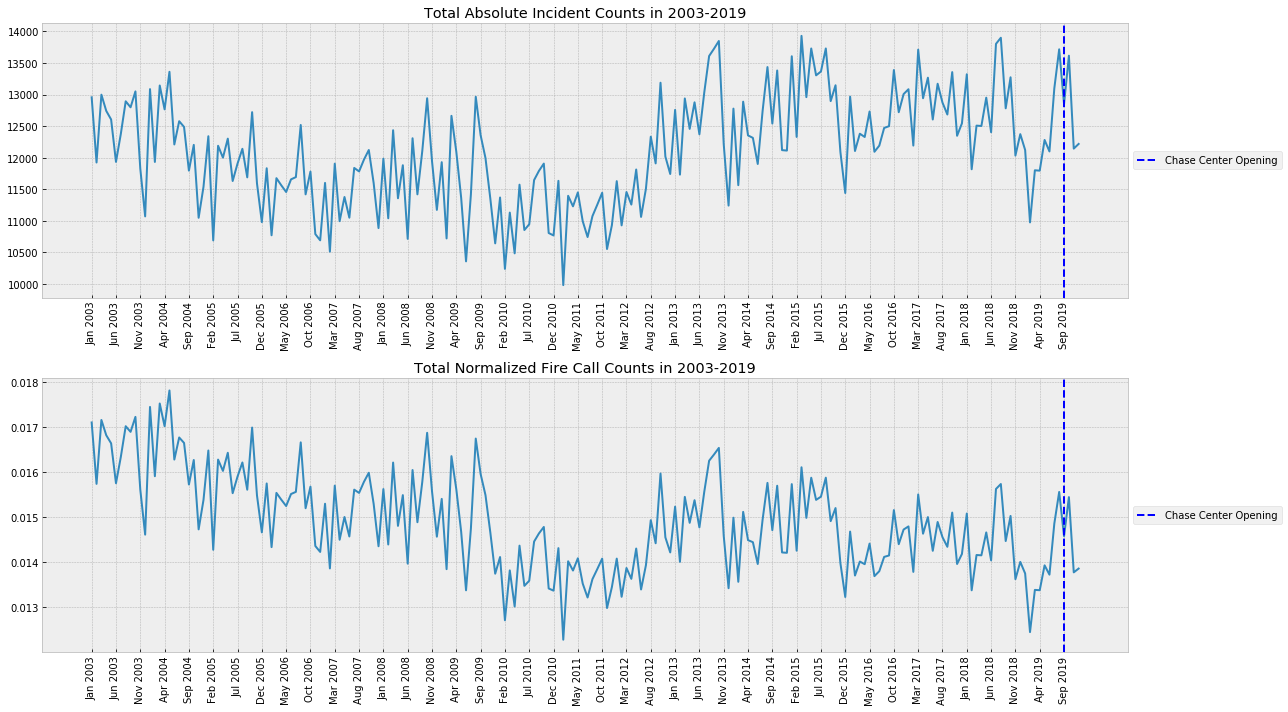

In [66]:
# date_range = pd.date_range(start='2018-01-01', end='2020-03-31')
# poljul19 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)].sort_values(['Incident Date'])
calls = allpolicelt2019['Incident Category'].unique()
labels = allpolicelt2019.groupby(['Year','Month']).count()['Incident Date']

fig, ax = plt.subplots(2,1,figsize=(18,10))
ax[0].plot(allpolicelt2019['Month-Year'].unique(),allpolicelt2019.groupby(['Year','Month']).count()['Incident Date'])
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Total Absolute Incident Counts in 2003-2019')
ax[0].set_xticks(allpolicelt2019['Month-Year'].unique()[::5])
ax[0].set_xticklabels(allpolicelt2019['Month-Year'].unique()[::5], rotation='vertical')
ax[0].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax[1].plot(allpolicelt2019['Month-Year'].unique(),allpolicelt2019.groupby(['Year','Month']).sum()['Norm'])
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Total Normalized Fire Call Counts in 2003-2019')
ax[1].set_xticks(allpolicelt2019['Month-Year'].unique()[::5])
ax[1].set_xticklabels(allpolicelt2019['Month-Year'].unique()[::5], rotation='vertical')
ax[1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.savefig('Graphs/Incidents2003-2019.png', dpi=300)

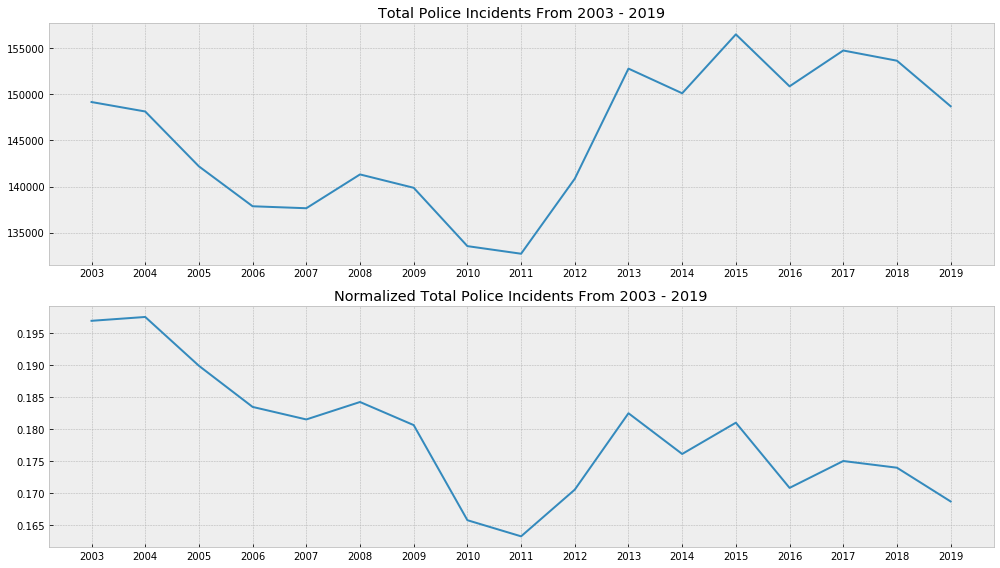

In [68]:
#Absolute Values
fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(allpolicelt2019['Year'].unique(), allpolicelt2019.groupby('Year').count()['Incident Date'])
ax[0].set_xticks(allpolicelt2019['Year'].unique())
ax[0].set_title('Total Police Incidents From 2003 - 2019')
ax[1].plot(allpolicelt2019['Year'].unique(),allpolicelt2019.groupby('Year').sum()['Norm'])
ax[1].set_xticks(allpolicelt2019['Year'].unique())
ax[1].set_title('Normalized Total Police Incidents From 2003 - 2019')
plt.savefig('Graphs/Total_Police_Calls_2003-2020.png', dpi=300)
plt.tight_layout()
plt.show()

In [69]:
allpolicelt2019.head()

,Incident Category,Incident Description,Incident Date,Incident Time,Police District,Latitude_x,Longitude_x,Year,Month,Month-Year,Norm
1906666,WEAPON LAWS,DESTRUCTION OF PROPERTY WITH EXPLOSIVES,2003-01-01,19:04,PARK,37.773156,-122.445087,2003,1,Jan 2003,0.000001
618092,BURGLARY,"BURGLARY OF HOTEL ROOM, UNLAWFUL ENTRY",2003-01-01,12:00,CENTRAL,37.798122,-122.405088,2003,1,Jan 2003,0.000001
942205,OTHER OFFENSES,FORTUNE TELLING,2003-01-01,00:01,SOUTHERN,37.782399,-122.392671,2003,1,Jan 2003,0.000001
618084,FRAUD,FALSE ID TO PEACE OFFICER,2003-01-01,17:30,MISSION,37.758915,-122.421381,2003,1,Jan 2003,0.000001
251953,WEAPON LAWS,LOITERING WHILE CARRYING CONCEALED WEAPON,2003-01-01,22:07,TENDERLOIN,37.784450,-122.416075,2003,1,Jan 2003,0.000001


In [71]:
addresses = allpolicelt2019.groupby(['Latitude_x', 'Longitude_x']).count()['Incident Date'].reset_index()
addresses['Lat_Long'] = addresses[['Latitude_x', 'Longitude_x']].values.tolist()
addresses.isna().sum()

Latitude_x       0
Longitude_x      0
Incident Date    0
Lat_Long         0
dtype: int64

In [72]:
addresses['Zipcode'] = addresses['Lat_Long'].apply(closest_pt)

In [ ]:
addresses['Xstr']=addresses['Latitude_x'].transform(lambda x: str(x))
addresses['Ystr']=addresses['Longitude_x''].transform(lambda x: str(x))
addresses['indxStr']=addresses['Xstr']+addresses['Ystr']
allpolicelt2019['Xstr']=allpolicelt2019['Latitude_x'].transform(lambda x: str(x))
allpolicelt2019['Ystr']=allpolicelt2019['Longitude_x''].transform(lambda x: str(x))
allpolicelt2019['indxStr']=allpolicelt2019['Xstr']+allpolicelt2019['Ystr']
add = addresses[['Zipcode','indxStr']]
allpolice_zips = pd.merge(allpolicelt2019, add, on='indxStr', how='left')